# **Question 1 - Singular Value Decomposition**

## **a)** Proof

For the singular value decomposition of matrix **$A = USV^T$**:
- **U** is an $m \times m$ complex unitary matrix. The columns of U = $[u_1, u_2, ..., u_{\alpha}]$ are the left-singular vectors of A, and form an orthonormal basis for the column space.
- $S$ is an $m \times n$ rectangular diagonal matrix with non-negative real numbers on the diagonal. These diagonal entries $s_{\alpha}$ are the singular values.
- $V^T$ is the transpose of an $n \times n$ complex unitary matrix. The columns of V = $[v_1, v_2, ..., v_{\alpha}]$ are the right-singular vectors of A, and for an orthonormal basis for the row space.

U, V, and S are defined such that these basis vectors diagonalize the matrix A.

i.e. $Av_1 = s_{1}u_1$, $Av_2 = s_{2}u_2$, ..., $Av_{\alpha} = s_{\alpha}u_{\alpha}$

so these equations tell us column by column that $AV = US$, and since $V^TV = I$, $A = USV^T$:
$$ A = USV^T = u_1s_{\alpha 1}v_1^T + ... + u_{\alpha}s_{\alpha}v_{\alpha}^T = \sum_{\alpha} u_{\alpha}s_{\alpha}v_{\alpha}^T $$

## **b)** SVD on a $10 \times 6$ matrix

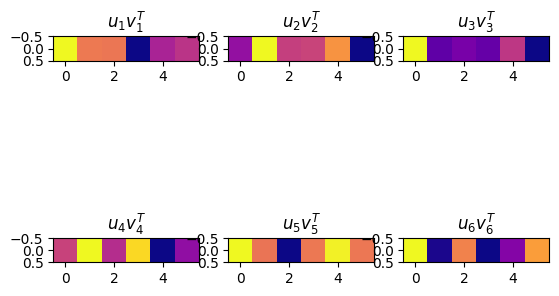

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# create a 10 x 6 matrix filled with random numbers (uniform between 0 and 1)
A = np.random.default_rng().uniform(0, 1, size=(10, 6))

# do SVD
U, S, V_T = np.linalg.svd(A, full_matrices=False)

uava = np.array([])
for i in range(len(V_T)):
    ua = U[i]
    va = V_T[i]
    uava = np.append(uava, ua * va)

# Plot each of these uava arrays as a colormap
plt.figure(1)

for i in range(len(V_T)):
    plt.subplot(2, 3, i+1)
    plt.imshow(uava[i*6:(i+1)*6].reshape(1, 6), cmap='plasma')
    plt.title(f"$u_{i+1} v_{i+1}^T$")

And now to show that the sum of all of these reconstruct the original matrix:

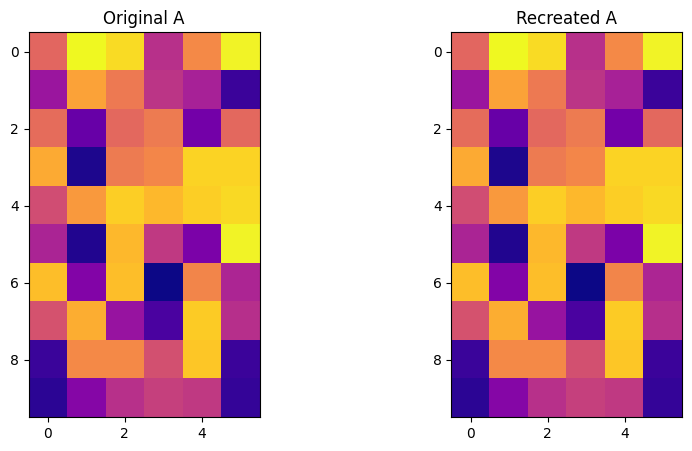

Recreation = Original: True


In [30]:
recreated_A = np.zeros(A.shape)

for i in range(len(S)):
    recreated_A += S[i] * np.outer(U[:, i], V_T[i])

plt.figure(2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(A, cmap='plasma')
plt.title('Original A')

plt.subplot(1, 2, 2)
plt.imshow(recreated_A, cmap='plasma')
plt.title('Recreated A')

plt.show()

print(f"Recreation = Original: {np.allclose(A, recreated_A)}")

## **c)** Truncation and Accuracy

Now try truncating the sum in equation, i.e. take only the n largest singular values in the sum. Calculate the mean error between the reconstructed matrix and the original matrix as a function of n.

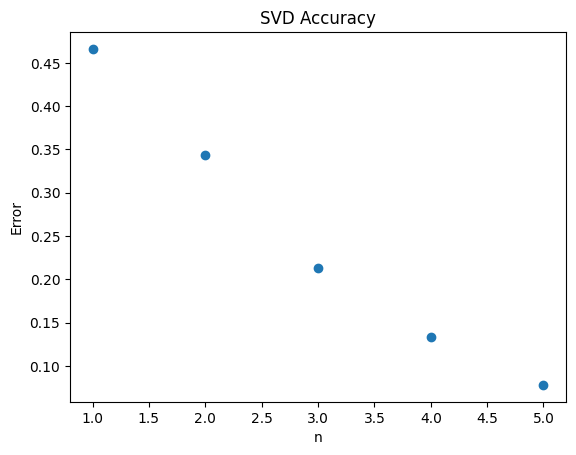

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def accuracy(A, recreated_A):
    return np.linalg.norm(A - recreated_A) / np.linalg.norm(A)

def do_SVD(m = 10, n = 6, plot = True):
    # create an m x n matrix filled with random numbers (uniform between 0 and 1)
    A = np.random.default_rng().uniform(0, 1, size=(m, n))

    # do SVD
    U, S, V_T = np.linalg.svd(A, full_matrices=False)

    acc = []
    truncate = np.arange(1, len(V_T))

    for n in truncate:

        recreated_A = np.zeros(A.shape)

        for i in range(n):
            recreated_A += S[i] * np.outer(U[:, i], V_T[i])

        # Get the accuracy for each truncation value
        acc.append(accuracy(A, recreated_A))

    if plot:
        plt.scatter(truncate, acc)
        plt.xlabel('n')
        plt.ylabel('Error')
        plt.title('SVD Accuracy')

    return acc, truncate


acc, n = do_SVD()

To prove the relationship, I've created a much larger array. This shows more completely the accuracy is changed by how much you truncate the matrices by.

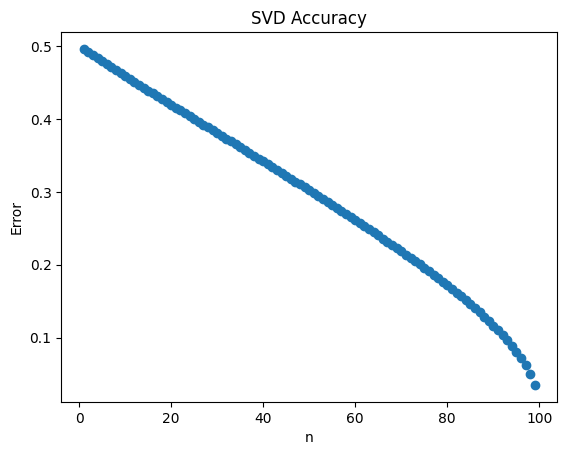

In [55]:
acc, n = do_SVD(100, 1000)

## **d)** Test on an image

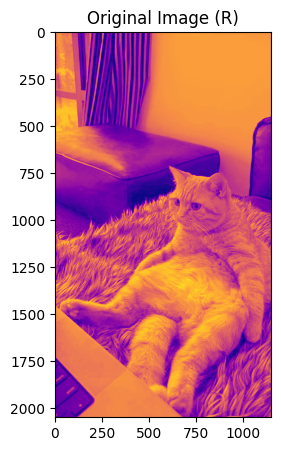

Original Size: 2359296
New Size: 680000
Assuming each pixel is stored in 8 bits (1 byte), the original image takes up 2359296 bytes and the new image takes up 680000 bytes.
Compression Ratio: 680000/2359296 = 0.2882215711805556


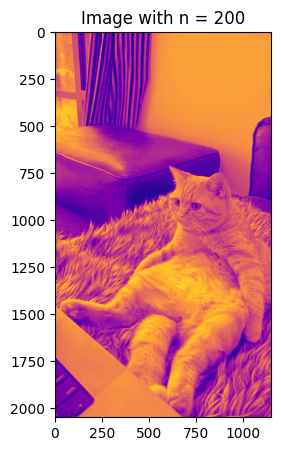

In [56]:
from PIL import Image

def do_SVD(A, truncate):
    # do SVD
    U, S, V_T = np.linalg.svd(A, full_matrices=False)

    recreated_A = np.zeros(A.shape)

    for i in range(n):
        recreated_A += S[i] * np.outer(U[:, i], V_T[i])

    return recreated_A

def image_compression(A, plot = True, n = None):
    U, S, V = np.linalg.svd(A)
    fig_count = 2
    
    if n == None:
        # Get a list of truncation values
        truncate = range(1, 150, 10)
        for i in range(len(truncate)):

            n = truncate[i]
            # Construct the diagonal matrix from the top k singular values
            S_matrix = np.diag(S[:n])

            # Recompute the original matrix
            recreated_A = U[:, :n] @ S_matrix @ V[:n, :]

            orig_x = np.size(A, 0)
            orig_y = np.size(A, 1)
            comp = (n*(orig_x + orig_y)) / (orig_x * orig_y)
            #print(f"Compression Ratio at n = {n}: {n} * ({orig_x} + {orig_y})/({orig_x}*{orig_y}) = {comp}")

            if plot:
                plt.figure(fig_count, figsize=(10, 5))
                plt.imshow(recreated_A, cmap = "plasma")
                plt.title(f"Image with n = {n}")
                plt.show
                fig_count += 1

    else:
        U, S, V_T = np.linalg.svd(A, full_matrices=False)
        new_u = U[:, :n]
        new_v = V_T[:n, :]
        S_matrix = np.diag(S[:n])
        
        recreated_A = np.zeros(A.shape)

        for i in range(n):
            recreated_A += S[i] * np.outer(U[:, i], V_T[i])

        old_size = np.size(A, 0) * np.size(A, 1)
        new_size = np.size(new_u, 0) * np.size(new_u, 1) + np.size(new_v, 0) * np.size(new_v, 1) + np.size(S_matrix, 0) * np.size(S_matrix, 1)

        print(f"Original Size: {old_size}")
        print(f"New Size: {new_size}")
        print(f"Assuming each pixel is stored in 8 bits (1 byte), the original image takes up {old_size} bytes and the new image takes up {new_size} bytes.")
        print(f"Compression Ratio: {new_size}/{old_size} = {new_size/old_size}")

        # Recompute the original matrix
        recreated_A = new_u @ S_matrix @ new_v

        if plot:
            plt.figure(fig_count, figsize=(10, 5))
            plt.imshow(recreated_A, cmap = "plasma")
            plt.title(f"Image with n = {n}")
            plt.show()

        orig_x = np.size(A, 0)
        orig_y = np.size(A, 1)
        comp = (n*(orig_x + orig_y)) / (orig_x * orig_y)
        #print(f"Compression Ratio at n = {n}: {n} * ({orig_x} + {orig_y})/({orig_x}*{orig_y}) = {comp}")


    


    

    


img = Image.open('A4_Image.jpg')
R = np.asarray(img)[:,:,0]   # the last index selects the RG or B component
G = np.asarray(img)[:,:,1]
B = np.asarray(img)[:,:,2]

# Plot the original image
plt.figure(1, figsize=(10, 5))
plt.imshow(R, cmap = "plasma")
plt.title('Original Image (R)')
plt.show()

_ = image_compression(R, n = 200)


Truncating the SVD at n = 200 gives a fairly accurate and detailed recreation of the original image. This is a compression ratio of 0.29. Assuming each pixel is stored in 8 bits (1 byte), the original image takes up ~2.4 MB and the new image takes up ~ 0.68 MB.

# **Question 2 - Fitting Planetary Orbits**

## **a)** Levenberg-Marquardt

Use the Levenberg-Marquardt method to fit the orbital parameters of a planet. The parameters are:
- The orbital period $P$, in days
- The planet mass $M_P$, in Jupiter masses
- The eccentricity of the orbit $e$, between 0 and 1
- The argument of the periastron $\omega$, in radians
- The time of pericenter $t$, in days
- The overall velocity offset $v$, in m/s

The Levenberg-Marquardt Method is:
1. Define a parameter $\lambda$ with a small starting value.
2. Using a quadratic expansion around $x_n$: $$f(x) = f(x_n) + (x - x_n)\frac{df}{dx}|_{x_n} + \frac{(x - x_n)^2}{2}\frac{d^2f}{dx^2}|_{x_n}$$
we find an updated value of the location of the minimum $x_{n+1}$ by minimising this: $$ \frac{df}{dx} = 0 \rightarrow \frac{df}{dx}|_{x_n} + (x_{n+1} - x_n)\frac{d^2f}{dx^2}|_{x_n} = 0 \rightarrow x_{n+1} = n_x - (\frac{d^2f}{dx^2}|_{x_n})^{-1}\frac{df}{dx}|_{x_n}$$
 In multiple dimensions, this is: $$f(\vec{x}) = f(\vec{x_n}) + (\vec{x} - \vec{x_n})\cdot\vec{\nabla f}(\vec{x_n}) + 1/2 (\vec{x} - \vec{x_n})\cdot H \cdot (\vec{x} - \vec{x_n})$$ where $H$ is the Hessian matrix $$(H)_{ij} = \frac{\partial^2f}{\partial x_i \partial x_j}$$ so the update becomes: $$ \vec{x_{n+1}} = \vec{x_n} - H^{-1}\cdot \vec{\nabla}f(\vec{x_n})$$
2. Solve as with Newton's method, but multiply the diagonal elements of $A^TA$ by $(1 + \lambda)$.
3. If $\chi^2$ with the new parameters $a_{n+1}$ is greater than with the current set of parameters $a_n$ then increase $\lambda$ by a factor of 10, go back to $a_n$ and try again.
4. If $\chi^2$ of $a_{n+1}$ is smaller than $\chi^2$ of $a_n$ then reduce $\lambda$ by a factor of 10 and accept $a_{n+1}$.

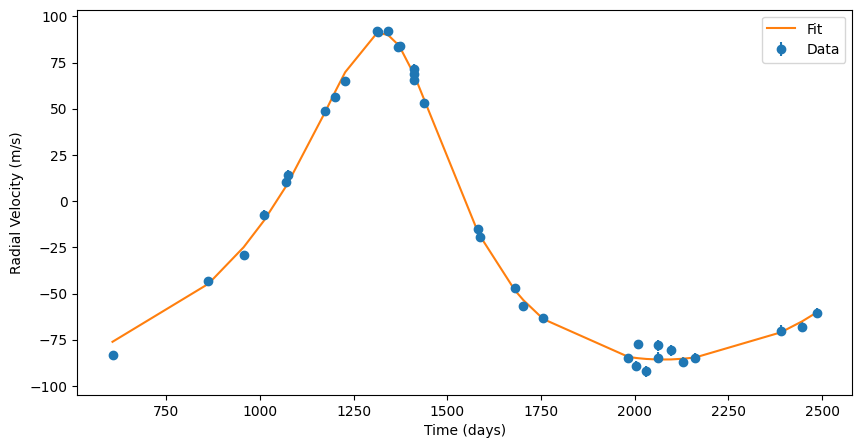

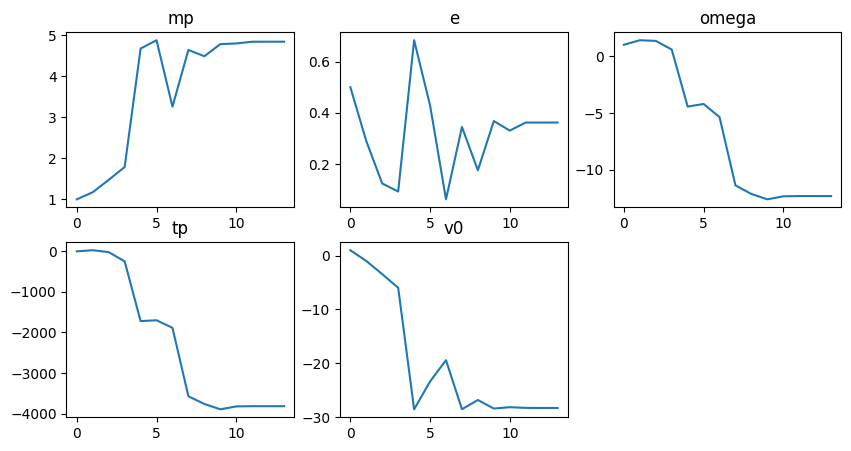

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

def rv(t, P, x):
    # Calculates the radial velocity of a star orbited by a planet
    # at the times in the vector t
    
    # extract the orbit parameters
    # P, t and tp in days, mp in Jupiter masses, v0 in m/s  
    mp, e, omega, tp, v0 = x
        
    # mean anomaly
    M = 2*np.pi * (t-tp) / P
    
    # velocity amplitude
    K = 204 * P**(-1/3) * mp  / np.sqrt(1.0-e*e) # m/s
    
    # solve Kepler's equation for the eccentric anomaly E - e * np.sin(E) = M
    # Iterative method from Heintz DW, "Double stars", Reidel, 1978
    # first guess
    E = M + e*np.sin(M)  + ((e**2)*np.sin(2*M)/2)
    while True:
        E0 = E 
        M0 = E0 - e*np.sin(E0)
        E = E0 + (M-M0)/(1.0 - e*np.cos(E0))
        if np.max(np.abs((E-E0))) < 1e-6:
            break
        
    # evaluate the velocities
    theta = 2.0 * np.arctan( np.sqrt((1+e)/(1-e)) * np.tan(E/2))
    vel = v0 + K * ( np.cos(theta + omega) + e * np.cos(omega))
    
    return vel

def get_derivative(param_array, t, P):
    # Calculates the analytic derivative of the radial velocity function with respect to each parameter
    y = rv(t, P, param_array)
    A = np.zeros((len(t), len(param_array)))

    for i in range(len(param_array)):
        h = 0.001
        param = param_array[i]
        temp_new_param = param_array.copy()
        temp_new_param[i] = param + h
        A[:, i] = (rv(t, P, temp_new_param) - rv(t, P, param_array)) / h    
    
    return y, A

tobs, vobs, eobs = np.loadtxt('A4_Orbital_Data.txt', unpack=True) # Read in data
# tobs = observation times
# vobs = observed velocities
# eobs = error in the observed velocities

# The orbital period of this planet is P = 1724 days
P = 1724

initial_params = np.array([1, 0.5, 1, 1, 1]) # mp, e, omega, tp, v0
param_history = np.array([initial_params.copy()])


chisq1 = 1.0
chisq = 1e99
lam = 1e-3

alpha = 0.1

while chisq > 1e-6:
    cur_params = param_history[-1]
    rv_func, A = get_derivative(cur_params, tobs, P)
    
    # Compute Residuals
    res = vobs - rv_func

    # Get new chi squared
    chisq = np.sum(res**2)

    # Calculate the update to the new parameters
    lhs = (A.T @ A)
    lhs = lhs @ (np.identity(len(cur_params)) * (1 + lam))
    rhs = A.T @ res
    d_params = np.linalg.inv(lhs)@rhs

    # Calc chi squard for new parameters
    if cur_params[1] + d_params[1] < 0 or cur_params[1] + d_params[1] > 1:
        d_params = alpha * d_params

    new_params = cur_params + d_params
    rv_func1, A1 = get_derivative(new_params, tobs, P)
    res1 = vobs - rv_func1
    chisq1 = np.sum(res1**2)

    # If the new chi squared is lower, accept the new parameters
    if chisq1 > chisq:
        lam *= 10
    else:
        lam /= 10
        param_history = np.vstack((param_history, new_params))

        # Break if improvement becomes too small
        if chisq - chisq1 < 1e-3:
            break

# Plot the resulting fit
plt.figure(1, figsize=(10, 5))
plt.errorbar(tobs, vobs, yerr=eobs, fmt='o', label='Data')
plt.plot(tobs, rv_func, label='Fit')
plt.xlabel('Time (days)')
plt.ylabel('Radial Velocity (m/s)')
plt.legend()

# Plot history of each parameter on a subplot
plt.figure(2, figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.plot(param_history[:, 0])
plt.title('mp')

plt.subplot(2, 3, 2)
plt.plot(param_history[:, 1])
plt.title('e')

plt.subplot(2, 3, 3)
plt.plot(param_history[:, 2])
plt.title('omega')

plt.subplot(2, 3, 4)
plt.plot(param_history[:, 3])
plt.title('tp')

plt.subplot(2, 3, 5)
plt.plot(param_history[:, 4])
plt.title('v0')

plt.show()

## **b)** Covariance

Evaluate C for the best fit using Levenberg-Marquardt and compare it to the covariance from Markov-Chain Monte-Carlo.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

def MCMC_Exoplanet():
    seed = 239
    rng = np.random.default_rng(seed)

    ### MCMC Exoplanet Fitting ### 
    # Solutions from the GitHub
    def rv(t, P, x):
        # Calculates the radial velocity of a star orbited by a planet
        # at the times in the vector t
        
        # extract the orbit parameters
        # P, t and tp in days, mp in Jupiter masses, v0 in m/s  
        mp, e, omega, tp, v0 = x
            
        # mean anomaly
        M = 2*np.pi * (t-tp) / P
        
        # velocity amplitude
        K = 204 * P**(-1/3) * mp  / np.sqrt(1.0-e*e) # m/s
        
        # solve Kepler's equation for the eccentric anomaly E - e * np.sin(E) = M
        # Iterative method from Heintz DW, "Double stars", Reidel, 1978
        # first guess
        E = M + e*np.sin(M)  + ((e**2)*np.sin(2*M)/2)
        while True:
            E0 = E 
            M0 = E0 - e*np.sin(E0)
            E = E0 + (M-M0)/(1.0 - e*np.cos(E0))
            if np.max(np.abs((E-E0))) < 1e-6:
                break
            
        # evaluate the velocities
        theta = 2.0 * np.arctan( np.sqrt((1+e)/(1-e)) * np.tan(E/2))
        vel = v0 + K * ( np.cos(theta + omega) + e * np.cos(omega))
        
        return vel

    def f(x, tobs, vobs, eobs):
        chisq = np.sum(((vobs-rv(tobs, P, x))/eobs)**2)
        return -chisq/2

    # Observations
    # These are for HD145675 from Butler et al. 2003
    tobs, vobs, eobs = np.loadtxt('A4_Orbital_Data.txt', unpack=True)

    # Number of samples to generate
    N = 10**5
    x = np.zeros((N, 5))

    # initial guess
    # P, mp, e, omega, tp, v0 
    P = 1724
    x[0] = [1.0, 0.0, 0.0, 0.0, 0.0]
    # and the widths for the jumps
    widths = (0.03, 0.03, 0.03, 3.0, 1.0)

    count = 0

    for i in range(N-1):
        
        # Proposal
        ii = np.random.randint(0, 5)
        x_try = np.copy(x[i])
        x_try[ii] += rng.normal(scale = widths[ii])

        #x_try[2] = (x_try[2]) % 1   # keep e between zero and 1
        
        # Accept the move or stay where we are
        u = rng.uniform()
        if u <= np.exp(f(x_try, tobs,vobs,eobs) - f(x[i], tobs,vobs,eobs)):
            x[i+1] = np.copy(x_try)
            count = count + 1
        else:
            x[i+1] = np.copy(x[i])
    
    return x

In [64]:
LM_Covariance = np.linalg.inv(A.T @ A)
MCMC_Covariance = np.cov(MCMC_Exoplanet(), rowvar = False)

LM Covariance
[ 3.08466134  0.56892085 -1.2173554   1.05068587 -1.16924842 -1.15854585]

[ 0.56892085  1.28300294 -0.74230416  0.2300973  -0.88682825  0.13512568]

[-1.2173554  -0.74230416  2.73356824 -1.17594079 -0.11113042 -0.4477331 ]

[ 1.05068587  0.2300973  -1.17594079  2.20847065 -0.61933041 -0.73264567]

[-1.16924842 -0.88682825 -0.11113042 -0.61933041  1.96567432  0.28076452]

MCMC Covariance
[ 7.38476801e-02  7.25334188e-03 -1.60718581e-02 -7.53058186e+00
 -6.27526102e-01]

[ 0.00725334  0.00105386 -0.0008091  -0.72955577 -0.06232955]

[-1.60718581e-02 -8.09101808e-04  6.70002831e-03  1.82404565e+00
  1.39630553e-01]

[-7.53058186e+00 -7.29555771e-01  1.82404565e+00  7.96039158e+02
  6.43301263e+01]

Mean LM Covariance: -0.2794317576471975
Mean MCMC Covariance: 0.001053863431175893


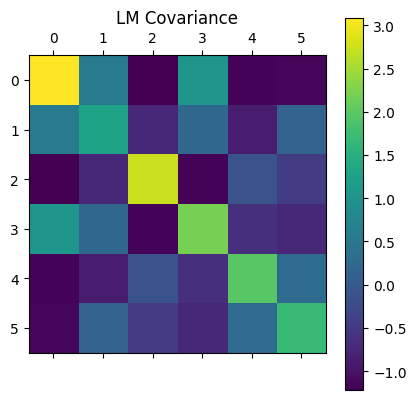

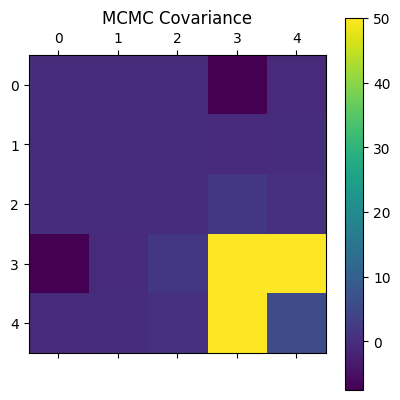

In [85]:
print("LM Covariance")
for i in range(0, len(LM_Covariance) - 1):
    print(f"{LM_Covariance[i]}\n")

print("MCMC Covariance")
for i in range(0, len(MCMC_Covariance) - 1):
    print(f"{MCMC_Covariance[i]}\n")

print(f"Mean LM Covariance: {np.median(LM_Covariance)}")
print(f"Mean MCMC Covariance: {np.median(MCMC_Covariance)}")

plt.matshow(LM_Covariance)
plt.colorbar()
plt.title("LM Covariance")
plt.show()

plt.matshow(MCMC_Covariance, vmax = 50)
plt.colorbar()
plt.title("MCMC Covariance")
plt.show()

Clearly, the MCMC has some extreme outliers in it's Covariance matrix compared to the LM method. However, the median value for MCMC is much smaller than for LM.